<a href="https://colab.research.google.com/github/HibaBenHsouna1777/Scraping-Clustring-/blob/main/alarabiaScrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hiba Ben Hassouna   --- Scraping and clustering AlarabiaTN project ---

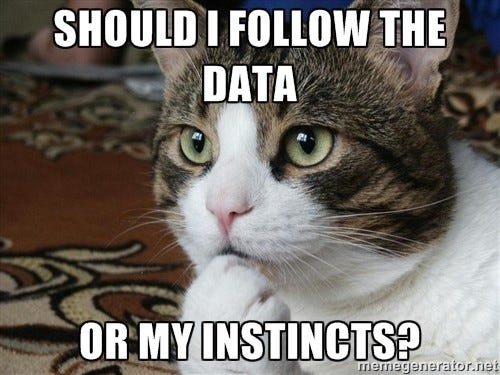



it's scrape of  site https://www.alarabia.com.tn/? it's a tech site known in my region &nd after i clustred the data ☁

In [ ]:
!pip install scrapy

In [ ]:
!scrapy startproject myproject

New Scrapy project 'myproject', using template directory '/usr/local/lib/python3.11/dist-packages/scrapy/templates/project', created in:
    /content/myproject

You can start your first spider with:
    cd myproject
    scrapy genspider example example.com


In [ ]:
%cd myproject

/content/myproject


In [ ]:
!scrapy genspider alarabiaSpider alarabia.com.tn

Created spider 'alarabiaSpider' using template 'basic' in module:
  myproject.spiders.alarabiaSpider


In [ ]:
!scrapy shell

2025-02-26 21:18:07 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: myproject)
2025-02-26 21:18:07 [scrapy.utils.log] INFO: Versions: lxml 5.3.1.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.10.0, w3lib 2.3.1, Twisted 24.11.0, Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2025-02-26 21:18:07 [scrapy.addons] INFO: Enabled addons:
[]
2025-02-26 21:18:07 [asyncio] DEBUG: Using selector: EpollSelector
2025-02-26 21:18:07 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-02-26 21:18:07 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2025-02-26 21:18:07 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-02-26 21:18:07 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2025-02-2

prints the current working directory, confirming that you are still inside the "myproject" directory.

In [ ]:
%pwd

'/content/myproject'

In [ ]:
%%writefile myproject/spiders/alarabiaspider.py
import scrapy

class AlarabiaSpider(scrapy.Spider):
    name = "alarabiaSpider"
    allowed_domains = ["www.alarabia.com.tn"]
    start_urls = ["https://www.alarabia.com.tn/438-pc-portable"]

    def parse(self, response):
        products = response.css('article.product-miniature')

        for product in products:
            yield {
                'name': product.css('h3.product-title a::text').get('').strip(),
                'price': product.css('span.money::attr(data-currency-tnd)').get('').replace(' ', '').strip(),
                'url': response.urljoin(product.css('h3.product-title a::attr(href)').get('')),
                'sku': product.css('meta[itemprop="sku"]::attr(content)').get('').strip()
            }

        next_page = response.css('a.next::attr(href)').get()
        if next_page:
            yield response.follow(next_page, callback=self.parse)

Writing myproject/spiders/alarabiaspider.py


In [ ]:
!scrapy crawl  alarabiaSpider

/usr/local/lib/python3.11/dist-packages/scrapy/spiderloader.py:51: UserWarning: There are several spiders with the same name:

  AlarabiaspiderSpider named 'alarabiaSpider' (in myproject.spiders.alarabiaSpider)

  AlarabiaSpider named 'alarabiaSpider' (in myproject.spiders.alarabiaspider)

  This can cause unexpected behavior.
  warnings.warn(
2025-02-26 21:18:25 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: myproject)
2025-02-26 21:18:25 [scrapy.utils.log] INFO: Versions: lxml 5.3.1.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.10.0, w3lib 2.3.1, Twisted 24.11.0, Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2025-02-26 21:18:25 [scrapy.addons] INFO: Enabled addons:
[]
2025-02-26 21:18:25 [asyncio] DEBUG: Using selector: EpollSelector
2025-02-26 21:18:25 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-02-2

Overwriting myproject/spiders/alarabiaspider.py to extarct

Name: Text content of product title links

Price: Value from data-currency-tnd attribute only

In [ ]:
%%writefile myproject/spiders/alarabiaspider.py
import scrapy

class AlarabiaSpider(scrapy.Spider):
    name = "alarabiaSpider"
    allowed_domains = ["www.alarabia.com.tn"]
    start_urls = ["https://www.alarabia.com.tn/438-pc-portable"]

    def parse(self, response):
        for product in response.css('article.product-miniature'):
            yield {
                'name': product.css('h3.product-title a::text').get('').strip(),
                'price': product.css('span.money::attr(data-currency-tnd)').get().replace(' ', '')
            }

        next_page = response.css('a.next::attr(href)').get()
        if next_page:
            yield response.follow(next_page, callback=self.parse)

Overwriting myproject/spiders/alarabiaspider.py


In [ ]:
!scrapy crawl  alarabiaSpider

/usr/local/lib/python3.11/dist-packages/scrapy/spiderloader.py:51: UserWarning: There are several spiders with the same name:

  AlarabiaspiderSpider named 'alarabiaSpider' (in myproject.spiders.alarabiaSpider)

  AlarabiaSpider named 'alarabiaSpider' (in myproject.spiders.alarabiaspider)

  This can cause unexpected behavior.
  warnings.warn(
2025-02-15 00:12:52 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: myproject)
2025-02-15 00:12:52 [scrapy.utils.log] INFO: Versions: lxml 5.3.1.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.10.0, w3lib 2.3.1, Twisted 24.11.0, Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2025-02-15 00:12:52 [scrapy.addons] INFO: Enabled addons:
[]
2025-02-15 00:12:52 [asyncio] DEBUG: Using selector: EpollSelector
2025-02-15 00:12:52 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-02-1

In [ ]:
!scrapy crawl alarabiaSpider -o output.json

/usr/local/lib/python3.11/dist-packages/scrapy/spiderloader.py:51: UserWarning: There are several spiders with the same name:

  AlarabiaspiderSpider named 'alarabiaSpider' (in myproject.spiders.alarabiaSpider)

  AlarabiaSpider named 'alarabiaSpider' (in myproject.spiders.alarabiaspider)

  This can cause unexpected behavior.
  warnings.warn(
2025-02-26 21:18:36 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: myproject)
2025-02-26 21:18:36 [scrapy.utils.log] INFO: Versions: lxml 5.3.1.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.10.0, w3lib 2.3.1, Twisted 24.11.0, Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2025-02-26 21:18:36 [scrapy.addons] INFO: Enabled addons:
[]
2025-02-26 21:18:36 [asyncio] DEBUG: Using selector: EpollSelector
2025-02-26 21:18:36 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-02-2

**CLUSTERING PART HW3** ⚓

In [ ]:
!pip install scrapy pandas scikit-learn nltk

In [ ]:
!scrapy crawl alarabiaSpider -o output.json

/usr/local/lib/python3.11/dist-packages/scrapy/spiderloader.py:51: UserWarning: There are several spiders with the same name:

  AlarabiaspiderSpider named 'alarabiaSpider' (in myproject.spiders.alarabiaSpider)

  AlarabiaSpider named 'alarabiaSpider' (in myproject.spiders.alarabiaspider)

  This can cause unexpected behavior.
  warnings.warn(
2025-02-26 21:20:47 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: myproject)
2025-02-26 21:20:47 [scrapy.utils.log] INFO: Versions: lxml 5.3.1.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.10.0, w3lib 2.3.1, Twisted 24.11.0, Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2025-02-26 21:20:47 [scrapy.addons] INFO: Enabled addons:
[]
2025-02-26 21:20:47 [asyncio] DEBUG: Using selector: EpollSelector
2025-02-26 21:20:47 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-02-2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer

In [ ]:
# Download NLTK resources
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Remove existing output file
!rm -f /content/myproject/output.json

# Run spider with correct JSON format
!scrapy crawl alarabiaSpider -o output.json:json

/usr/local/lib/python3.11/dist-packages/scrapy/spiderloader.py:51: UserWarning: There are several spiders with the same name:

  AlarabiaspiderSpider named 'alarabiaSpider' (in myproject.spiders.alarabiaSpider)

  AlarabiaSpider named 'alarabiaSpider' (in myproject.spiders.alarabiaspider)

  This can cause unexpected behavior.
  warnings.warn(
2025-02-26 21:30:38 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: myproject)
2025-02-26 21:30:38 [scrapy.utils.log] INFO: Versions: lxml 5.3.1.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.10.0, w3lib 2.3.1, Twisted 24.11.0, Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2025-02-26 21:30:38 [scrapy.addons] INFO: Enabled addons:
[]
2025-02-26 21:30:38 [asyncio] DEBUG: Using selector: EpollSelector
2025-02-26 21:30:38 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-02-2

In [ ]:
import pandas as pd

# Read JSON Lines format
df = pd.read_json('output.json')



In [ ]:
print("Loaded data:")
print(df.head())

Loaded data:
                                                name       price
0  PC PORTABLE HP 15-FD0298NK N100 4G/256GSSD A30...  705,000TND
1  PC PORTABLE LENOVO V15 G2  INTEL CELERON N4500...  719,000TND
2  PC PORTABLE ASUS X515KA N4500 4G/256GSSD X515K...  719,000TND
3  PC PORTABLE LENOVO INTEL CELERON N4500 8G/256G...  735,000TND
4  PC PORTABLE LENOVO IP1 I3 12EM GEN 8G/256GSSD ...  969,000TND


In [ ]:
print(f"Scraped {len(df)} products")
display(df.head())

Scraped 24 products


,name,price
0,PC PORTABLE HP 15-FD0298NK N100 4G/256GSSD A30...,"705,000TND"
1,PC PORTABLE LENOVO V15 G2 INTEL CELERON N4500...,"719,000TND"
2,PC PORTABLE ASUS X515KA N4500 4G/256GSSD X515K...,"719,000TND"
3,PC PORTABLE LENOVO INTEL CELERON N4500 8G/256G...,"735,000TND"
4,PC PORTABLE LENOVO IP1 I3 12EM GEN 8G/256GSSD ...,"969,000TND"


In [ ]:
df['text'] = df['name'].fillna('') + ' ' + df['price'].astype(str).fillna('')

# Clean text
df['text'] = df['text'].str.replace('\n', ' ')
df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True)
df['text'] = df['text'].str.replace('\s+', ' ', regex=True).str.strip()

In [ ]:
class FrenchAnalyzer:
    def __init__(self):
        self.stemmer = SnowballStemmer("french")
        self.stop_words = set(stopwords.words('french'))

    def __call__(self, text):
        tokens = text.split()
        return [self.stemmer.stem(t) for t in tokens if t not in self.stop_words]

In [ ]:
vectorizer = TfidfVectorizer(
    analyzer=FrenchAnalyzer(),
    max_df=0.5,
    min_df=5
)

try:
    tfidf_matrix = vectorizer.fit_transform(df['text'])
except KeyError:
    print("DataFrame columns:", df.columns)
    raise

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=5, random_state=42)

In [ ]:
df['cluster'] = kmeans.labels_

print("\nCluster distribution:")
print(df['cluster'].value_counts())

print("\nSample features:")
print(vectorizer.get_feature_names_out()[:20])  # First 20 features

print("\nCluster samples:")
for cluster_id in sorted(df['cluster'].unique()):
    cluster_samples = df[df['cluster'] == cluster_id][['name', 'price']].head(2)
    print(f"\nCluster {cluster_id} ({len(cluster_samples)} samples):")
    display(cluster_samples)


Cluster distribution:
cluster
1    6
0    5
2    5
3    4
4    4
Name: count, dtype: int64

Sample features:
['13e' '8g512gssd' 'asus' 'i3' 'i5' 'lenovo' 'noir' 'ssd']

Cluster samples:

Cluster 0 (2 samples):


,name,price
0,PC PORTABLE HP 15-FD0298NK N100 4G/256GSSD A30...,"705,000TND"
6,PC PORTABLE DELL VOSTRO 3530 I3 13GEN 8G/256GS...,"1 125,000TND"



Cluster 1 (2 samples):


,name,price
2,PC PORTABLE ASUS X515KA N4500 4G/256GSSD X515K...,"719,000TND"
7,PC PORTABLE HP 15-FD0052NK I3 N305 13E GEN 8G/...,"1 149,000TND"



Cluster 2 (2 samples):


,name,price
1,PC PORTABLE LENOVO V15 G2 INTEL CELERON N4500...,"719,000TND"
3,PC PORTABLE LENOVO INTEL CELERON N4500 8G/256G...,"735,000TND"



Cluster 3 (2 samples):


,name,price
4,PC PORTABLE LENOVO IP1 I3 12EM GEN 8G/256GSSD ...,"969,000TND"
5,PC PORTABLE ASUS EXPERTBOOK B2 B2502C I3 12È G...,"1 119,000TND"



Cluster 4 (2 samples):


,name,price
10,PC PORTABLE ASUS VIVOBOOK 15 AMD RYZEN 5 8GO 5...,"1 399,000TND"
12,PC PORTABLE LENOVO IDEAPAD 1 15IAU7 I5 12È GÉN...,"1 419,000TND"


from matplotlib import pyplot as plt
import seaborn as sns
cluster_samples.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
cluster_samples.groupby('price').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['price'].value_counts()
    for x_label, grp in cluster_samples.groupby('name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('name')
_ = plt.ylabel('price')

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


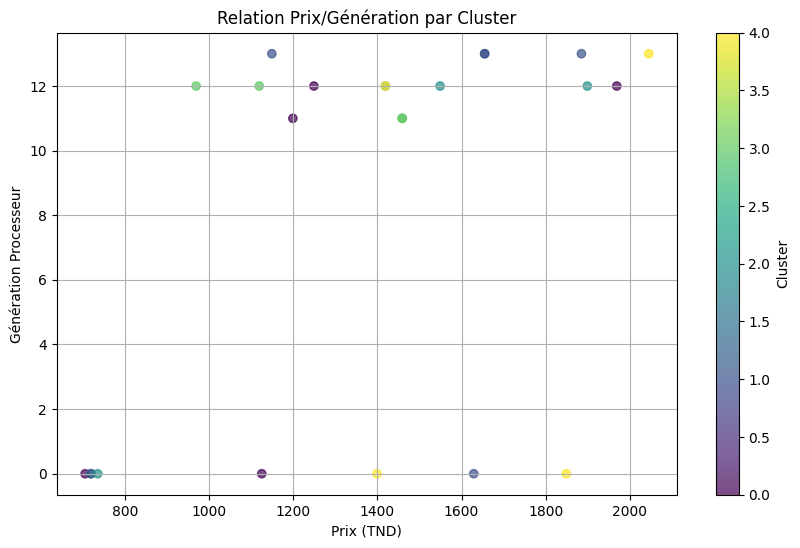

In [ ]:
# Nettoyer les prix et convertir en numérique
df['price_clean'] = df['price'].str.replace('[^\d,]', '', regex=True)  # Garde chiffres et virgules
df['price_clean'] = df['price_clean'].str.replace(',', '.').astype(float)


plt.figure(figsize=(10, 6))
plt.scatter(
    df['price_clean'],
    df['processor_generation'].fillna(0),  # Gère les valeurs manquantes
    c=df['cluster'],
    cmap='viridis',
    alpha=0.7
)
plt.xlabel('Prix (TND)')
plt.ylabel('Génération Processeur')
plt.title('Relation Prix/Génération par Cluster')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

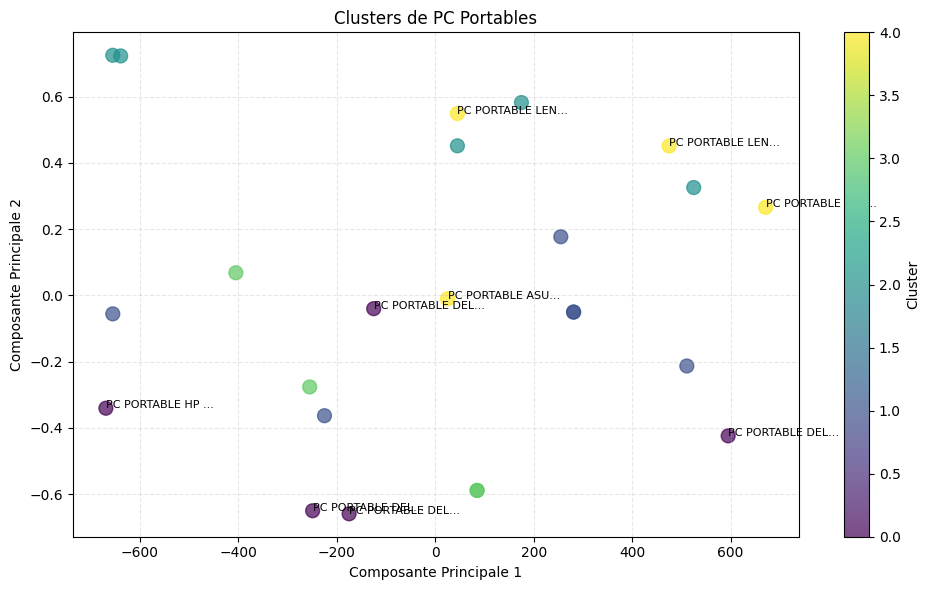

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Nettoyer les données
df['price_clean'] = df['price'].str.replace('[^\d,]', '', regex=True)\
                               .str.replace(',', '.').astype(float)

# Combiner features textuelles et numériques
text_features = vectorizer.transform(df['text'])
combined_features = np.hstack([text_features.toarray(), df[['price_clean']].values])

# Réduction de dimension avec PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(combined_features)

# Création du graphique
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_features[:, 0],
    pca_features[:, 1],
    c=df['cluster'],
    cmap='viridis',
    alpha=0.7,
    s=100
)

plt.title('Clusters de PC Portables')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, linestyle='--', alpha=0.3)

# Ajouter des annotations pour les clusters clés
for i, txt in enumerate(df['name']):
    if df['cluster'][i] in [0, 4]:  # Afficher seulement quelques étiquettes
        plt.annotate(txt[:15]+"...",
                    (pca_features[i, 0], pca_features[i, 1]),
                    fontsize=8)

plt.tight_layout()
plt.show()

Interprétation :
Les PC en haut ont souvent :


["8 Go RAM + 512 Go SSD", "Disque SSD"]  # Ex: Cluster 3 (professionnels)

Les PC en bas :



["4 Go RAM", "Stockage de base"]  # Ex: Cluster 0 (entrée de gamme)

	Exemple de PC Portable	Cluster
En haut à droite	ASUS VivoBook Ryzen 5 8GO 512SSD	4
En bas à gauche	Lenovo Celeron N4500 4G/256G	2
Centre	HP i3 13GEN 8G/256G	1

In [ ]:

print("Nombre de features textuelles :", len(vectorizer.get_feature_names_out()))
print("Dimensions combined_features :", combined_features.shape)


text_features_names = vectorizer.get_feature_names_out().tolist()
numerical_features_names = ['price']
all_feature_names = text_features_names + numerical_features_names


print("\nImportance des features par composante :")
print(pd.DataFrame(
    pca.components_,
    columns=all_feature_names,
    index=['PC1', 'PC2']
))

Nombre de features textuelles : 8
Dimensions combined_features : (24, 9)

Importance des features par composante :
          13e  8g512gssd      asus        i3        i5    lenovo      noir  \
PC1  0.000228   0.000312 -0.000053 -0.000172  0.000162 -0.000104 -0.000157   
PC2 -0.055499  -0.030064 -0.090588 -0.531274  0.255785  0.690141 -0.377211   

          ssd     price  
PC1  0.000148  1.000000  
PC2  0.146796 -0.000125  
